In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#분류 Dicision Tree
from sklearn.tree import DecisionTreeClassifier
#데이터 분할
from sklearn.model_selection import train_test_split
#confusion matrix
from sklearn.metrics import confusion_matrix

import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [56]:
import os

os.environ['PATH'] += os.pathsep + '/home/piai/anaconda3/lib/python3.8/site-packages'

In [57]:
matplotlib.rc('font', family = 'NanumGothic')

In [58]:
df_raw = pd.read_csv('/home/piai/Downloads/HMEQ.csv', engine = 'python')
df_raw.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1700    30548   40320.0  HomeImp   Other   9.0      0     0.0   
1    1  1800    28502   43034.0  HomeImp   Other  11.0      0     0.0   
2    0  2300   102370  120953.0  HomeImp  Office   2.0      0     0.0   
3    1  2400    34863   47471.0  HomeImp     Mgr  12.0      0     0.0   
4    0  2400    98449  117195.0  HomeImp  Office   4.0      0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0  101.466002   1.0     8  37.113614  
1   88.766030   0.0     8  36.884894  
2   90.992533   0.0    13  31.588503  
3   70.491080   1.0    21  38.263601  
4   93.811775   0.0    13  29.681827

In [59]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


### 결측치 제거

In [60]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [61]:
df_raw['JOB'].value_counts()

Other      1444
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [62]:
#결측치 대체 함수. 
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True)

#숫자형 변수의 결측치는 해당 변수의 평균값 입력
df_raw.fillna(df_raw.mean(), inplace = True)

In [63]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [64]:
#get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)

#더미변수 생성된 데이터의 상위5개 row 확인
df_raw_dummy.head()

BAD  LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0    1  1700    30548   40320.0   9.0      0     0.0  101.466002   1.0     8   
1    1  1800    28502   43034.0  11.0      0     0.0   88.766030   0.0     8   
2    0  2300   102370  120953.0   2.0      0     0.0   90.992533   0.0    13   
3    1  2400    34863   47471.0  12.0      0     0.0   70.491080   1.0    21   
4    0  2400    98449  117195.0   4.0      0     0.0   93.811775   0.0    13   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  37.113614               0               1        0           0          1   
1  36.884894               0               1        0           0          1   
2  31.588503               0               1        0           1          0   
3  38.263601               0               1        1           0          0   
4  29.681827               0               1        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0

### 데이터 분할

In [65]:
#train_test_split (X : 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)

#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD', axis = 1 , inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

train data X size :(2623, 18)
train data Y size :(2623,)
test data X size :(1125, 18)
test data Y size :(1125,)


### 모델 생성


In [69]:
#모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))


#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.932


In [70]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

### 모델 parameter 조정
### max_depth: 최대 깊이 변경에 따른 모델 성능


In [71]:
#max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy
df_accuracy_depth.round(3)

Depth  TrainScore  TestScore
0      1       0.926      0.924
1      2       0.931      0.927
2      3       0.934      0.921
3      4       0.937      0.928
4      5       0.940      0.930
5      6       0.941      0.930
6      7       0.947      0.935
7      8       0.951      0.933
8      9       0.957      0.933
9     10       0.960      0.938

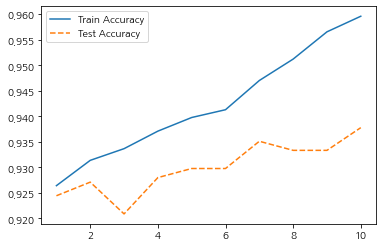

In [72]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = "--", label = 'Test Accuracy')
plt.legend()

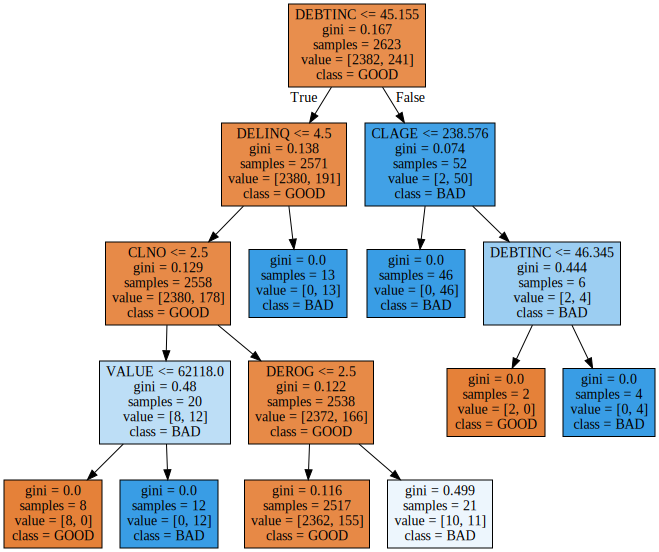

In [73]:
#변수명 저장
v_feature_name = df_train_x.columns

#최대 깊이 = 4 모델
tree_low = DecisionTreeClassifier(max_depth = 4,random_state = 1234)
tree_low.fit(df_train_x , df_train_y)

#트리 모델을 tree_low.dot 파일로 저장(목표변수 , 0: GOOD, 1:BAD)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'], 
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

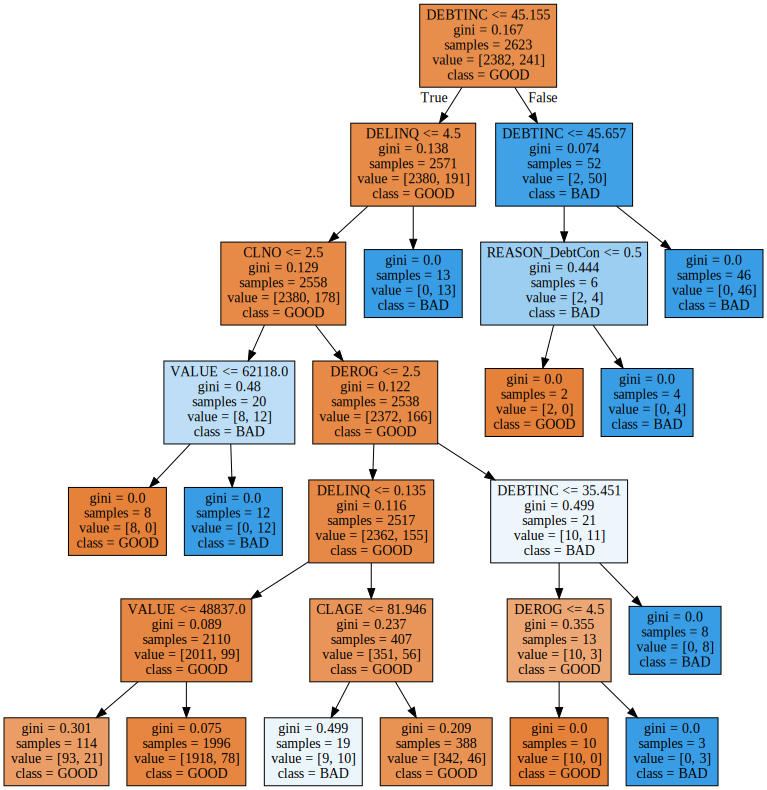

In [74]:
#변수명 저장
v_feature_name = df_train_x.columns

#최대 깊이 = 4 모델
tree_low = DecisionTreeClassifier(max_depth = 6,random_state = 1234)
tree_low.fit(df_train_x , df_train_y)

#트리 모델을 tree_low.dot 파일로 저장(목표변수 , 0: GOOD, 1:BAD)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'], 
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [75]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

#min_samples_split : 분리노드 최소 자료 수 * 참조 : para_split : [1,2,3,...,19]

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = 4,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['Trainaccuracy'] = train_accuracy
df_score_split['Testaccuracy'] = test_accuracy
df_score_split.round(3)

MinSamplesSplit  Trainaccuracy  Testaccuracy
0               10          0.936         0.928
1               20          0.936         0.928
2               30          0.933         0.921
3               40          0.933         0.921
4               50          0.933         0.921
5               60          0.933         0.921
6               70          0.933         0.921
7               80          0.933         0.921
8               90          0.933         0.921
9              100          0.933         0.921

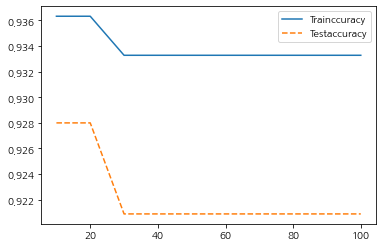

In [76]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = 'Trainccuracy')
plt.plot(para_split, test_accuracy, linestyle = "--", label = 'Testaccuracy')
plt.legend()

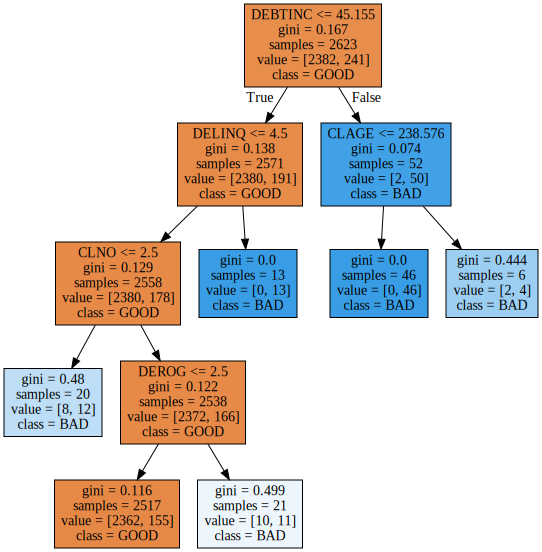

In [77]:
#변수명 저장
v_feature_name = df_train_x.columns

#분리 노드의 최소 자료 수 = 20 모델
tree_low = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 30,
                                  random_state = 1234)
tree_low.fit(df_train_x , df_train_y)
    
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD', 'BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

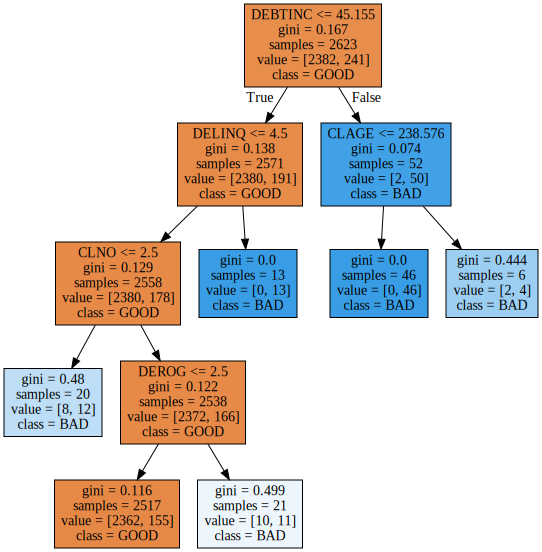

In [78]:
#변수명 저장
v_feature_name = df_train_x.columns

#분리 노드의 최소 자료 수 = 20 모델
tree_high = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 20,
                                  random_state = 1234)
tree_high.fit(df_train_x , df_train_y)
    
export_graphviz(tree_low, out_file = 'tree_high.dot', class_names = ['GOOD', 'BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [79]:
#train 및 test 설명력 결과 저장
train_accuracy = []
test_accuracy = []

#min_samples_leaf : 잎사귀 최소 자료 수 * 참조 : para_leaf : [1,2,3,...,19]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234 , min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 4,
                                  min_samples_split = 20)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainAccuracy'] = train_accuracy
df_score_leaf['TestAccuracy'] = test_accuracy
#모델 설명력 확인
df_score_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0               2          0.936         0.928
1               4          0.936         0.928
2               6          0.936         0.928
3               8          0.936         0.928
4              10          0.936         0.928
5              12          0.933         0.921
6              14          0.932         0.917
7              16          0.932         0.919
8              18          0.932         0.919
9              20          0.932         0.919

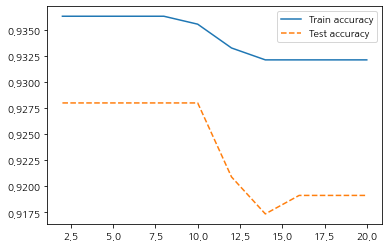

In [80]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = 'Train accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = 'Test accuracy')
plt.legend()

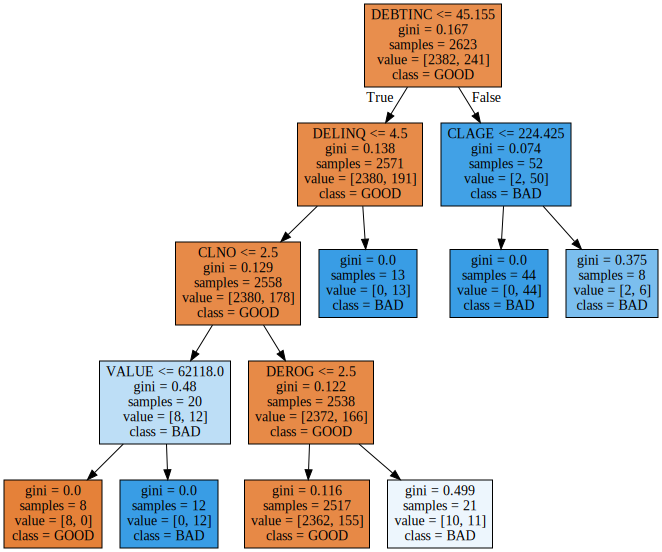

In [81]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 8 모델
tree_low = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 8,max_depth = 4,
                                  min_samples_split = 20)
tree_low.fit(df_train_x , df_train_y)
export_graphviz(tree_low, out_file = 'tree_low.dot', class_names = ['GOOD','BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

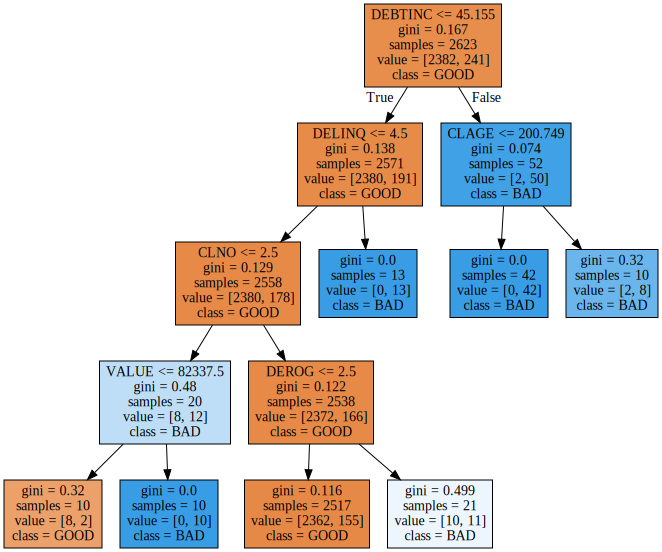

In [83]:
#변수명 저장
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 8 모델
tree_high = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = 10 ,max_depth = 4,
                                  min_samples_split = 20)
tree_high.fit(df_train_x , df_train_y)
export_graphviz(tree_low, out_file = 'tree_high.dot', class_names = ['GOOD','BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 선정

In [48]:
#모델 생성
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.936
Score on test set : 0.928


### 최종 모델 시각화

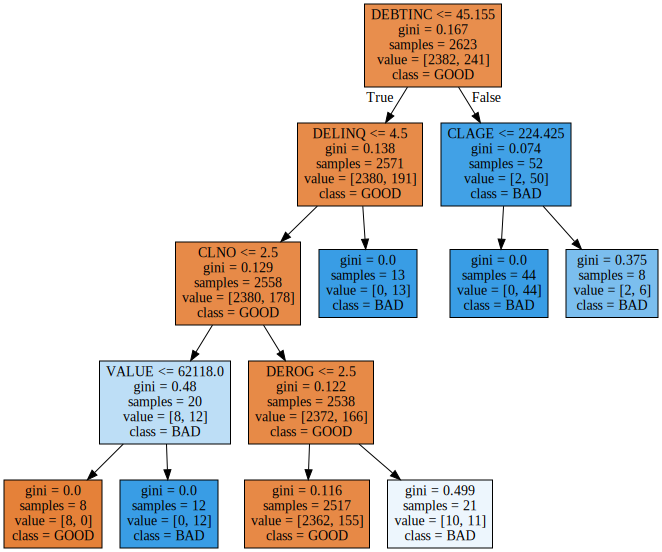

In [49]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names = ['GOOD','BAD'],
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 평가

In [50]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy: {0:3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.928000

Confusion matrix : 
[[1015    6]
 [  75   29]]


### 결론 도출
### feature_importances_ : 설명변수의 중요도

In [51]:
#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

Feature  Importance
9          DEBTINC       0.602
5           DELINQ       0.168
8             CLNO       0.085
2            VALUE       0.072
4            DEROG       0.067
6            CLAGE       0.006
12         JOB_Mgr       0.000
16       JOB_Sales       0.000
15     JOB_ProfExe       0.000
14       JOB_Other       0.000
13      JOB_Office       0.000
0             LOAN       0.000
11  REASON_HomeImp       0.000
10  REASON_DebtCon       0.000
1          MORTDUE       0.000
7             NINQ       0.000
3              YOJ       0.000
17        JOB_Self       0.000

Text(0, 0.5, '변수')

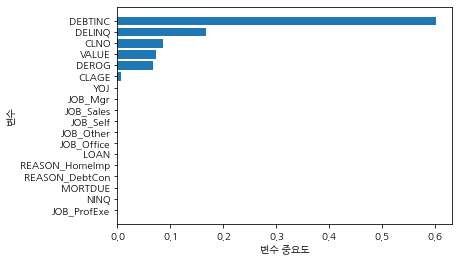

In [52]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 설명변수, 목표변수 데이터 지정, 다음 중요 변수 파악 시 가장 중요도가 높은 변수 삭제 후 다시 진행하기!!
df_train_x2 = df_~~~
v_feature_name = df_train_x2.columns

### GridSearchCV 를 이용한 최적 parameter 찾기

In [54]:
estimator = DecisionTreeClassifier()

#구하고자 하는 parameter 와 범위
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf': para_leaf}

#정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best estimator model : \n {grid_dt.best_estimator_}')
print(f'\nbest parameter : \n {grid_dt.best_params_}')
print(f'\nbest score : \n {grid_dt.best_score_.round(3)}')

best estimator model : 
 DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

best parameter : 
 {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score : 
 0.936
